In [215]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import requests
import bs4
import sklearn
import seaborn as sns

%matplotlib inline

In [180]:
df = pd.read_excel('pop-sexe-age-quinquennal6816.xls', sheet_name = 'COM_2016', header = 12)


In [181]:
df = df[df['Département\nen géographie courante']=='75']

In [182]:
df.index = df['Libellé de commune']
columns_to_keep = []
for gender in ['Hommes','Femmes']:
    for i in range(0,19):
        columns_to_keep.append('De '+str(i*5)+' à '+str(i*5+4)+' ans\n'+gender+'\nRP2016')
    columns_to_keep.append('95 ans et plus\n'+gender+'\nRP2016')

df = df[columns_to_keep].astype(float)


In [183]:
df['Total'] = df.sum(axis = 1)
df

,De 0 à 4 ans\nHommes\nRP2016,De 5 à 9 ans\nHommes\nRP2016,De 10 à 14 ans\nHommes\nRP2016,De 15 à 19 ans\nHommes\nRP2016,De 20 à 24 ans\nHommes\nRP2016,De 25 à 29 ans\nHommes\nRP2016,De 30 à 34 ans\nHommes\nRP2016,De 35 à 39 ans\nHommes\nRP2016,De 40 à 44 ans\nHommes\nRP2016,De 45 à 49 ans\nHommes\nRP2016,...,De 55 à 59 ans\nFemmes\nRP2016,De 60 à 64 ans\nFemmes\nRP2016,De 65 à 69 ans\nFemmes\nRP2016,De 70 à 74 ans\nFemmes\nRP2016,De 75 à 79 ans\nFemmes\nRP2016,De 80 à 84 ans\nFemmes\nRP2016,De 85 à 89 ans\nFemmes\nRP2016,De 90 à 94 ans\nFemmes\nRP2016,95 ans et plus\nFemmes\nRP2016,Total
Libellé de commune,,,,,,,,,,,,,,,,,,,,,
Paris 1er Arrondissement,398.515655,286.351599,357.103500,288.654348,627.847876,832.363722,753.398376,713.971851,624.228966,629.482022,...,452.954178,391.532141,457.348486,333.119049,244.941736,228.012402,181.691272,110.143834,36.605120,16244.000152
Paris 2e Arrondissement,466.968529,373.644720,353.111660,317.026234,840.129303,1365.642986,1175.539038,1010.618492,965.314888,805.608368,...,526.054111,424.873698,380.040396,275.925764,188.999077,173.199602,91.468376,73.459971,11.835937,20273.143152
Paris 3e Arrondissement,734.963011,687.073601,598.766325,677.603841,1237.943405,2188.771840,1804.478057,1420.960258,1526.657754,1286.494450,...,903.564505,812.252750,865.156226,657.089446,452.480764,316.517059,225.782785,119.488379,55.621298,34798.242309
Paris 4e Arrondissement,558.549493,511.561888,489.738515,656.826421,1025.300077,1432.204728,1171.416148,920.369370,1026.036911,1047.466931,...,790.951679,847.009401,869.069242,582.363594,526.906776,388.887509,246.419641,140.515052,27.556861,27462.294385
Paris 5e Arrondissement,966.953862,1156.189111,1245.737309,1885.761651,3237.035946,2905.896487,1887.306056,1660.693603,1576.642862,1651.533110,...,1718.904460,1768.299069,1883.740198,1561.756604,1203.842681,1037.626170,649.903717,427.678436,154.416085,59086.240808
Paris 6e Arrondissement,651.128480,696.875882,697.961276,1607.953576,1681.739658,1709.927070,1210.019029,985.767291,1050.937879,967.380879,...,1243.325101,1254.835924,1458.287250,1213.193364,982.701517,835.307028,648.787485,415.266138,128.634170,40920.999946
Paris 7e Arrondissement,1016.841749,985.599955,1269.870122,1413.766114,2087.546769,2234.105528,1643.623649,1410.545384,1431.590411,1551.884787,...,1688.585231,1712.764711,1746.170738,1433.916182,1058.649438,942.654681,749.810100,575.142496,174.029092,52487.921240
Paris 8e Arrondissement,910.835704,1015.581915,919.429583,1173.737330,1372.001312,1495.338536,1202.957607,1000.772236,1296.419200,1170.504747,...,1142.734140,1066.363123,990.381874,753.186403,553.872197,415.357730,418.577971,200.984102,51.521822,36432.999823
Paris 9e Arrondissement,1515.657868,1389.304188,1251.514667,1274.332507,1763.642299,3513.061718,2926.439600,2327.077131,2245.053473,2028.491427,...,1484.322672,1367.669680,1372.715673,987.327803,745.256950,621.277007,551.629275,274.282386,50.469626,59610.244216


In [184]:
pop_df = pd.DataFrame()
for i in range(3):
    columns = ['De '+str(i*20+j*5+15)+' à '+str(i*20+j*5+19)+' ans\n'+gender+'\nRP2016' for j in range(4) for gender in ['Hommes','Femmes']]
    pop_df['De '+str(i*20+15)+' à '+str(i*20+34)+' ans'] = df[columns].sum(axis = 1)

In [185]:
pop_df['Total'] = df['Total']


In [186]:
for i in range(3):
    pop_df.iloc[:,i] = pop_df.iloc[:,i]/pop_df['Total']

In [187]:
pop_df

,De 15 à 34 ans,De 35 à 54 ans,De 55 à 74 ans,Total
Libellé de commune,,,,
Paris 1er Arrondissement,0.304984,0.293311,0.200678,16244.000152
Paris 2e Arrondissement,0.371790,0.308069,0.157653,20273.143152
Paris 3e Arrondissement,0.352620,0.292733,0.181666,34798.242309
Paris 4e Arrondissement,0.325404,0.275308,0.207742,27462.294385
Paris 5e Arrondissement,0.355510,0.227235,0.210024,59086.240808
Paris 6e Arrondissement,0.336723,0.216614,0.226496,40920.999946
Paris 7e Arrondissement,0.302551,0.236669,0.227975,52487.921240
Paris 8e Arrondissement,0.308403,0.264516,0.204852,36432.999823
Paris 9e Arrondissement,0.349526,0.282783,0.165940,59610.244216


In [188]:
from bs4 import BeautifulSoup

req = requests.get('https://fr.wikipedia.org/wiki/Arrondissements_de_Paris')
soup = BeautifulSoup(req.content,'html.parser')

In [189]:
table = soup.find('table',attrs = {'class','wikitable sortable alternance'})
superficies = []
rows = table.find_all('tr')
for i in range(2,22):
    superficies.append(rows[i].find_all('td')[2].string)
pop_df['Superficies'] = superficies
pop_df['Superficies'] = pop_df['Superficies'].astype(int)
pop_df['Densities'] = pop_df['Total']/pop_df['Superficies']

In [190]:
pop_df.drop(['Total','Superficies'], axis = 1, inplace = True)

In [191]:
pop_df

,De 15 à 34 ans,De 35 à 54 ans,De 55 à 74 ans,Densities
Libellé de commune,,,,
Paris 1er Arrondissement,0.304984,0.293311,0.200678,88.765028
Paris 2e Arrondissement,0.371790,0.308069,0.157653,204.779224
Paris 3e Arrondissement,0.352620,0.292733,0.181666,297.420874
Paris 4e Arrondissement,0.325404,0.275308,0.207742,171.639340
Paris 5e Arrondissement,0.355510,0.227235,0.210024,232.622995
Paris 6e Arrondissement,0.336723,0.216614,0.226496,190.330232
Paris 7e Arrondissement,0.302551,0.236669,0.227975,128.332326
Paris 8e Arrondissement,0.308403,0.264516,0.204852,93.899484
Paris 9e Arrondissement,0.349526,0.282783,0.165940,273.441487


In [192]:
revenue_df = pd.read_excel('FILO2017_DISP_COM.xlsx',sheet_name = 'ENSEMBLE', header = 4)

In [193]:
import re
revenue_df = revenue_df[revenue_df['Code géographique'].str.contains(r'75\d{3}')]
revenue_df.index = revenue_df['Libellé géographique']
revenue_df

,Code géographique,Libellé géographique,Nbre de ménages fiscaux,Nbre de personnes dans les ménages fiscaux,Nbre d'unités de consommation dans les ménages fiscaux,1er quartile (€),Médiane (€),3e quartile (€),Écart interquartile (€),1er décile (€),...,dont part des salaires et traitements(%),dont part des indemnités de chômage (%),dont part des revenus des activités non salariées (%),"Part des pensions, retraites et rentes (%)",Part des revenus du patrimoine et autres revenus (%),Part de l'ensemble des prestations sociales (%),dont part des prestations familiales (%),dont part des minima sociaux (%),dont part des prestations logement (%),Part des impôts (%)
Libellé géographique,,,,,,,,,,,,,,,,,,,,,
Paris,75056,Paris,1028942,2062520,1485751,16490,27400,42810,26330,10510,...,76.4,3,8.8,19.9,17.1,2.8,0.8,1.2,0.8,-27.9
Paris 1er Arrondissement,75101,Paris 1er Arrondissement,8533,15560,11701.5,20220,32890,54330,34120,12430,...,76.5,2.6,12.3,16,24.8,1.4,0.4,0.6,0.5,-33.6
Paris 2e Arrondissement,75102,Paris 2e Arrondissement,11557,20803,15676.6,18450,31470,49150,30690,10780,...,86.3,3.5,10.8,11.2,14.9,2,0.4,0.9,0.6,-28.8
Paris 3e Arrondissement,75103,Paris 3e Arrondissement,17750,32035,24145.2,19200,32310,50740,31540,11200,...,80.6,3.4,12.8,14.8,17,1.7,0.4,0.7,0.5,-30.3
Paris 4e Arrondissement,75104,Paris 4e Arrondissement,14043,25626,19233.7,19310,31200,49840,30520,11620,...,73,3,10.6,20.5,22.6,1.8,0.5,0.8,0.5,-31.6
Paris 5e Arrondissement,75105,Paris 5e Arrondissement,26109,48939,36339,20790,33350,50710,29920,12190,...,71.1,2.2,10.9,24.8,19.9,1.6,0.4,0.7,0.5,-30.5
Paris 6e Arrondissement,75106,Paris 6e Arrondissement,18426,34348,25626.1,23200,39330,66400,43210,13220,...,65,1.8,15,23.5,32.4,0.8,0.2,0.3,0.2,-38.5
Paris 7e Arrondissement,75107,Paris 7e Arrondissement,24290,47566,34771.3,24790,43270,75930,51140,14540,...,69.3,1.3,15.7,18.7,33.2,0.6,0.2,0.2,0.2,-38.8
Paris 8e Arrondissement,75108,Paris 8e Arrondissement,17387,37343,26246.2,23580,41270,69010,45430,13510,...,78.3,1.8,13.6,15.3,28.2,0.9,0.3,0.4,0.2,-38.2


In [194]:
revenue_df = revenue_df['Médiane (€)'].drop('Paris')

In [195]:
pop_df['Median revenue'] = revenue_df.astype(int)

In [196]:
pop_df

,De 15 à 34 ans,De 35 à 54 ans,De 55 à 74 ans,Densities,Median revenue
Libellé de commune,,,,,
Paris 1er Arrondissement,0.304984,0.293311,0.200678,88.765028,32890
Paris 2e Arrondissement,0.371790,0.308069,0.157653,204.779224,31470
Paris 3e Arrondissement,0.352620,0.292733,0.181666,297.420874,32310
Paris 4e Arrondissement,0.325404,0.275308,0.207742,171.639340,31200
Paris 5e Arrondissement,0.355510,0.227235,0.210024,232.622995,33350
Paris 6e Arrondissement,0.336723,0.216614,0.226496,190.330232,39330
Paris 7e Arrondissement,0.302551,0.236669,0.227975,128.332326,43270
Paris 8e Arrondissement,0.308403,0.264516,0.204852,93.899484,41270
Paris 9e Arrondissement,0.349526,0.282783,0.165940,273.441487,33980


In [197]:
CLIENT_ID = 'BWPEENWH3CWY3SKJT24EFITHI3MKSF1NAFC1IVBSC5DDYKEH' # your Foursquare ID
CLIENT_SECRET = 'EIQE2K2CDDBQSCAZ5KOLN2PHONXB31RJLBLGEPKS0VJ20X25' # your Foursquare Secret
VERSION = '20200424'
LIMIT = 100

In [198]:
def get_venues(places):
    
    venues_list = []
    
    for place in places:
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                place,
                LIMIT)
        
        req = requests.get(url).json()
        results = req["response"]['groups'][0]['items']
        coords = req['response']['geocode']['center']
    
        venues_list.append([(
                place,
                coords['lat'],
                coords['lng'],
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District',
                  'Latitude',
                  'Longitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return nearby_venues
    

In [200]:
places = [str(75000+i)+', Paris, France' for i in range(1,21)]
df = get_venues(places)

In [201]:
df

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"75001, Paris, France",48.8592,2.3417,Place du Louvre,48.859841,2.340822,Plaza
1,"75001, Paris, France",48.8592,2.3417,Église Saint-Germain-l'Auxerrois (Église Saint...,48.859520,2.341306,Church
2,"75001, Paris, France",48.8592,2.3417,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
3,"75001, Paris, France",48.8592,2.3417,Coffee Crêpes,48.858841,2.340802,Coffee Shop
4,"75001, Paris, France",48.8592,2.3417,Hôtel Maison Albar Paris Céline,48.860552,2.344259,Hotel
...,...,...,...,...,...,...,...
1929,"75020, Paris, France",48.8646,2.3984,La Base Filante,48.861270,2.387483,Bar
1930,"75020, Paris, France",48.8646,2.3984,El Juanchito,48.861967,2.385197,Colombian Restaurant
1931,"75020, Paris, France",48.8646,2.3984,Il Capriccio,48.854644,2.396222,Pizza Place
1932,"75020, Paris, France",48.8646,2.3984,Hôtel Les Chansonniers,48.865452,2.384100,Hotel


In [202]:
df['Coffee rate'] = df['Venue Category'].str.contains('Café') | df['Venue Category'].str.contains('Coffee')

In [203]:
df = df.groupby(['District'])[['Coffee rate','Latitude','Longitude']].mean()
df.index = pop_df.index

In [204]:
df

,Coffee rate,Latitude,Longitude
Libellé de commune,,,
Paris 1er Arrondissement,0.050000,48.8592,2.3417
Paris 2e Arrondissement,0.020000,48.8655,2.3426
Paris 3e Arrondissement,0.040000,48.8637,2.3615
Paris 4e Arrondissement,0.050000,48.8601,2.3507
Paris 5e Arrondissement,0.050000,48.8448,2.3471
Paris 6e Arrondissement,0.031915,48.8493,2.3300
Paris 7e Arrondissement,0.040000,48.8565,2.3210
Paris 8e Arrondissement,0.064935,48.8763,2.3183
Paris 9e Arrondissement,0.010309,48.8718,2.3399


In [205]:
district_df = pop_df.join(df)
district_df

,De 15 à 34 ans,De 35 à 54 ans,De 55 à 74 ans,Densities,Median revenue,Coffee rate,Latitude,Longitude
Libellé de commune,,,,,,,,
Paris 1er Arrondissement,0.304984,0.293311,0.200678,88.765028,32890,0.050000,48.8592,2.3417
Paris 2e Arrondissement,0.371790,0.308069,0.157653,204.779224,31470,0.020000,48.8655,2.3426
Paris 3e Arrondissement,0.352620,0.292733,0.181666,297.420874,32310,0.040000,48.8637,2.3615
Paris 4e Arrondissement,0.325404,0.275308,0.207742,171.639340,31200,0.050000,48.8601,2.3507
Paris 5e Arrondissement,0.355510,0.227235,0.210024,232.622995,33350,0.050000,48.8448,2.3471
Paris 6e Arrondissement,0.336723,0.216614,0.226496,190.330232,39330,0.031915,48.8493,2.3300
Paris 7e Arrondissement,0.302551,0.236669,0.227975,128.332326,43270,0.040000,48.8565,2.3210
Paris 8e Arrondissement,0.308403,0.264516,0.204852,93.899484,41270,0.064935,48.8763,2.3183
Paris 9e Arrondissement,0.349526,0.282783,0.165940,273.441487,33980,0.010309,48.8718,2.3399


In [206]:
district_df

,De 15 à 34 ans,De 35 à 54 ans,De 55 à 74 ans,Densities,Median revenue,Coffee rate,Latitude,Longitude
Libellé de commune,,,,,,,,
Paris 1er Arrondissement,0.304984,0.293311,0.200678,88.765028,32890,0.050000,48.8592,2.3417
Paris 2e Arrondissement,0.371790,0.308069,0.157653,204.779224,31470,0.020000,48.8655,2.3426
Paris 3e Arrondissement,0.352620,0.292733,0.181666,297.420874,32310,0.040000,48.8637,2.3615
Paris 4e Arrondissement,0.325404,0.275308,0.207742,171.639340,31200,0.050000,48.8601,2.3507
Paris 5e Arrondissement,0.355510,0.227235,0.210024,232.622995,33350,0.050000,48.8448,2.3471
Paris 6e Arrondissement,0.336723,0.216614,0.226496,190.330232,39330,0.031915,48.8493,2.3300
Paris 7e Arrondissement,0.302551,0.236669,0.227975,128.332326,43270,0.040000,48.8565,2.3210
Paris 8e Arrondissement,0.308403,0.264516,0.204852,93.899484,41270,0.064935,48.8763,2.3183
Paris 9e Arrondissement,0.349526,0.282783,0.165940,273.441487,33980,0.010309,48.8718,2.3399


In [207]:
district_df.describe()

,De 15 à 34 ans,De 35 à 54 ans,De 55 à 74 ans,Densities,Median revenue,Coffee rate,Latitude,Longitude
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.324267,0.268014,0.196759,241.278027,30859.000000,0.037820,48.860460,2.344130
std,0.027773,0.024784,0.020562,80.522889,6444.628036,0.016720,0.016617,0.029783
min,0.255760,0.216614,0.157653,88.765028,20320.000000,0.010309,48.832200,2.276900
25%,0.306970,0.254545,0.184521,201.166976,27187.500000,0.020306,48.848175,2.325275
50%,0.327301,0.271404,0.197940,248.447272,31040.000000,0.040000,48.861900,2.343500
75%,0.341002,0.287360,0.208422,296.333986,33507.500000,0.050000,48.871125,2.357450
max,0.371790,0.308069,0.227975,400.618529,43270.000000,0.070000,48.892500,2.398400


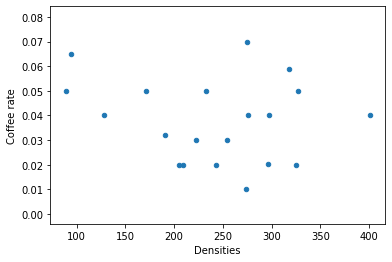

In [208]:
district_df.plot(y = 'Coffee rate', x='Densities', kind = 'scatter')

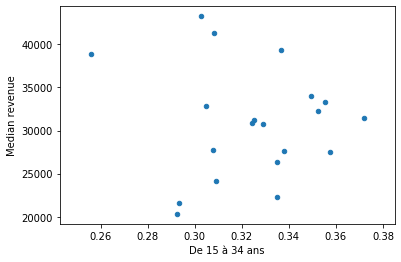

In [209]:
district_df.plot(x = 'De 15 à 34 ans', y='Median revenue', kind = 'scatter')

In [210]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit(district_df).transform(district_df)

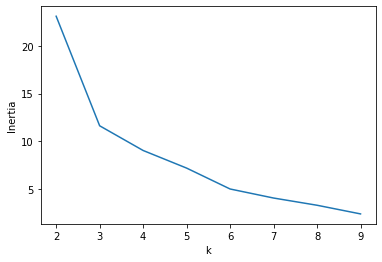

In [241]:
from sklearn.cluster import KMeans

best_districts = scaled_df[:,[3,5]]

inertias = []
k=[]
for i in range(2,10):
    kmeans = KMeans(init = 'k-means++', n_init = 10, n_clusters = i).fit(best_districts)
    k.append(i)
    inertias.append(kmeans.inertia_)

plt.plot(k,inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [264]:
kmeans = KMeans(init = 'k-means++', n_init = 10, n_clusters = 3, random_state = 0).fit(best_districts)
district_df['Potential customers clusters'] = kmeans.labels_.astype(object)
district_df['Potential customers clusters'] = district_df['Potential customers clusters'].map({2:'High  density districts',0:'Low coffee shops presence',1:'Low density and high coffee shops presence'})

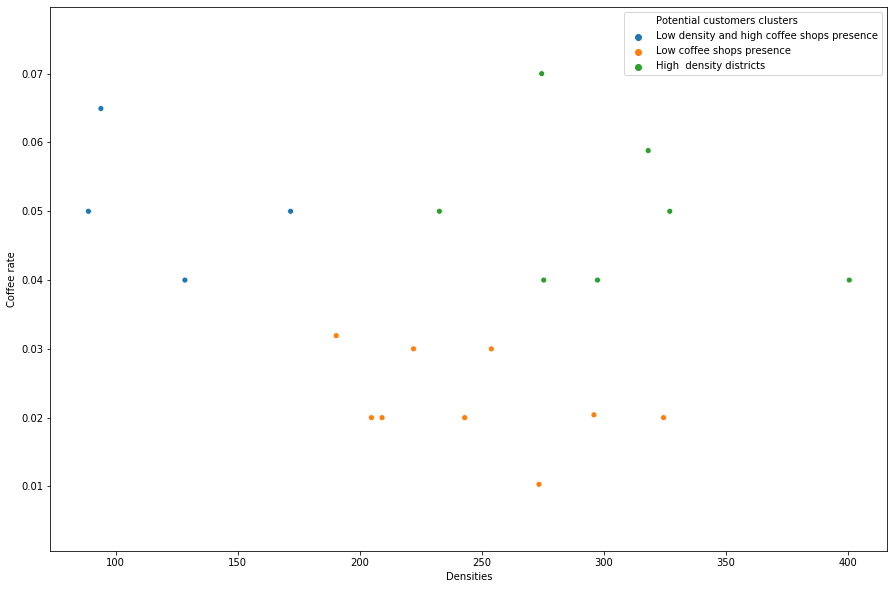

In [294]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data = district_df, x='Densities', y='Coffee rate', hue='Potential customers clusters')

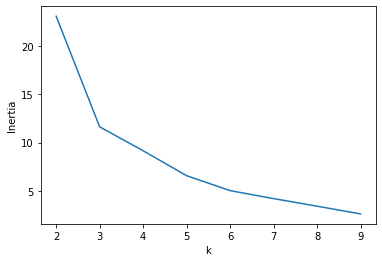

In [242]:
from sklearn.cluster import KMeans

population_characteristics = scaled_df[:,[0,1,2,4]]

inertias = []
k=[]
for i in range(2,10):
    kmeans2 = KMeans(init = 'k-means++', n_init = 10, n_clusters = i).fit(best_districts)
    k.append(i)
    inertias.append(kmeans2.inertia_)

plt.plot(k,inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [269]:
kmeans2 = KMeans(init = 'k-means++', n_init = 10, n_clusters = 3, random_state = 0).fit(population_characteristics)
district_df['Population segmentation clusters'] = kmeans2.labels_.astype(object)
district_df['Population segmentation clusters'] = district_df['Population segmentation clusters'].map({0:'Older and lower revenue population',1:'Younger and lower revenue population',2:'Higher revenue population'})

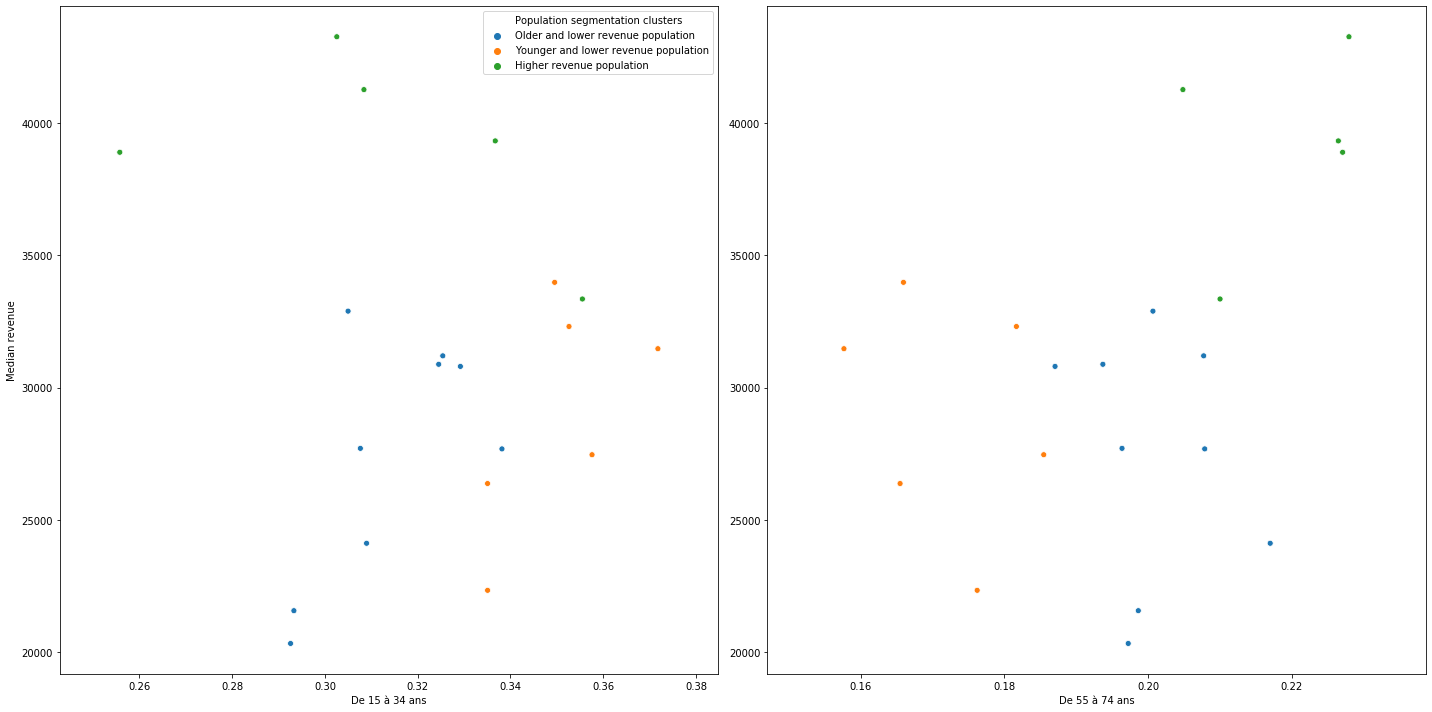

In [288]:
fig, axs = plt.subplots(1, 2, figsize = (20,10))
sns.scatterplot(data = district_df, x='De 15 à 34 ans', y='Median revenue', hue='Population segmentation clusters', ax = axs[0])
sns.scatterplot(data = district_df, x='De 55 à 74 ans', y='Median revenue', hue='Population segmentation clusters', ax = axs[1], legend = None)
plt.ylabel('')
fig.tight_layout()


In [299]:
import matplotlib.cm as cm
import matplotlib.colors as colors

latitude = 48.8534100
longitude = 2.3488000

unique_clusters = list(set(district_df['Potential customers clusters']))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.viridis(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(district_df['Latitude'], district_df['Longitude'], district_df.index, district_df['Potential customers clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[unique_clusters.index(cluster)-1],
        fill=True,
        fill_color=rainbow[unique_clusters.index(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [298]:
import matplotlib.cm as cm
import matplotlib.colors as colors

latitude = 48.8534100
longitude = 2.3488000

unique_clusters = list(set(district_df['Population segmentation clusters']))

map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.viridis(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(district_df['Latitude'], district_df['Longitude'], district_df.index, district_df['Population segmentation clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[unique_clusters.index(cluster)-1],
        fill=True,
        fill_color=rainbow[unique_clusters.index(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2